Let's generate N time discrete series, each consisting of T observations of a random variable X.

We'll consider a triangular-distributed random variable, $$X\sim Tr([0,1]).$$
                    

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [8]:
N=5000
T=100

x_min=0
x_max=1

X=np.zeros((N,T))

for i in range(0,N):
    for j in range(0,T):
        X[i][j]=np.random.triangular(x_min,(x_min+x_max)/2,x_max)

Next, we

1. bin the range [0,1] into 10 intervals of width 0.1, and count observations in each bin, for each of the N time series.

2. compute the cumulative number of all events smaller than the upper end of each bin, for each of the N time series.

3. estimate the uncertainty in this number as the standard deviation over all all time series.

4. construct the cumulative decision weight $F_w$ by adding, for one time series (the 0th one), the uncertainty in the count, and then normalize.

In [9]:
n=np.zeros((N,10))

for series in range(0,N):
    for obs in range(0,T):
        n[series][int(10*X[series][obs])]=n[series][int(10*X[series][obs])]+1
        
cumulative=np.cumsum(n,1)
uncertainty=np.std(cumulative,0)

Fw=np.zeros(11)
for i in range(0,10):
    Fw[i+1]=cumulative[0][i]+uncertainty[i]

Fw=Fw/Fw[-1]

Finally, we display the resulting ``probability weighting,'' in the usual way and recover the inverse-S curve... or do we?

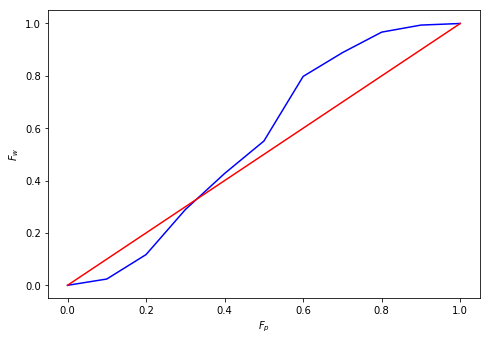

In [10]:
Fp=np.linspace(0,1,11)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(Fp,Fw,'b',label='')
ax.plot(Fp,Fp,'r',label='')
ax.legend()
ax.set_xlabel(r'$F_p$')
ax.set_ylabel(r'$F_w$')
plt.show() 